In [1]:
import pyaudio
import numpy as np

FRAMES_PER_BUFFER = 3200
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 16000
p = pyaudio.PyAudio()

def record_audio():
    stream = p.open(
        format=FORMAT,
        channels=CHANNELS,
        rate=RATE,
        input=True,
        frames_per_buffer=FRAMES_PER_BUFFER
    )

    #print("start recording...")

    frames = []
    seconds = 1
    for i in range(0, int(RATE / FRAMES_PER_BUFFER * seconds)):
        data = stream.read(FRAMES_PER_BUFFER)
        frames.append(data)

    # print("recording stopped")

    stream.stop_stream()
    stream.close()
    
    return np.frombuffer(b''.join(frames), dtype=np.int16)


def terminate():
    p.terminate()

In [5]:
record_audio()

array([  0,   0,  -1, ..., 591, 688, 808], dtype=int16)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pyaudio

FRAMES_PER_BUFFER = 3200
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 16000
p = pyaudio.PyAudio()

def record_audio(seconds=1):
    stream = p.open(
        format=FORMAT,
        channels=CHANNELS,
        rate=RATE,
        input=True,
        frames_per_buffer=FRAMES_PER_BUFFER
    )

    frames = []
    for i in range(0, int(RATE / FRAMES_PER_BUFFER * seconds)):
        data = stream.read(FRAMES_PER_BUFFER)
        frames.append(data)

    stream.stop_stream()
    stream.close()

    return np.frombuffer(b''.join(frames), dtype=np.int16)


def plot_fourier_transform(audio_data):
    # Compute the Fourier Transform
    spectrum = np.fft.fft(audio_data)
    
    # Generate frequency axis
    freq = np.fft.fftfreq(len(spectrum), d=1/RATE)
    
    # Plot the magnitude spectrum
    plt.plot(freq, np.abs(spectrum))
    plt.title("Fourier Transform - Magnitude Spectrum")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.xlim(0, RATE // 2)  # We're only interested in the positive frequencies
    plt.show()



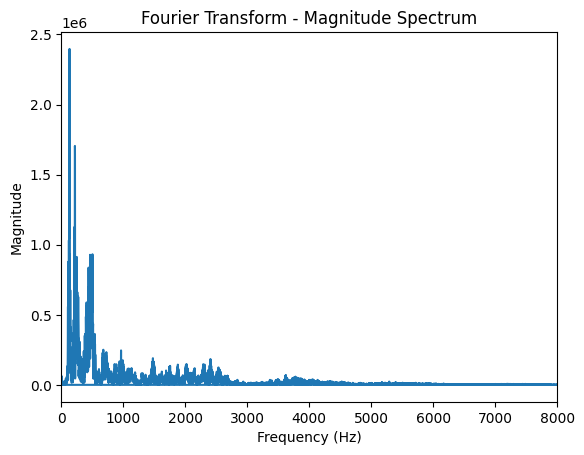

In [10]:
audio_data = record_audio()
plot_fourier_transform(audio_data)


In [2]:
import sounddevice as sd
import soundfile as sf
import os
import time

def record_and_save_audio(duration, sample_rate, file_name):
    """
    Record audio from the microphone and save it as a WAV file.

    Parameters:
    duration (int): Duration of the recording in seconds.
    sample_rate (int): Sample rate in Hz.
    file_name (str): Name of the WAV file to save the recording.
    """
    audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float32')
    sd.wait()  # Wait until recording is finished
    sf.write(file_name, audio, sample_rate)

# Parameters
duration = 0.3  # Record for 1 second
sample_rate = 16000  # Sampling rate in Hz
base_directory = "./data/external_noise/"

# Check if base_directory exists, if not, create it
if not os.path.exists(base_directory):
    os.makedirs(base_directory)

# Loop to record 100 times
for i in range(46,1000):
    file_name = os.path.join(base_directory, f"noise_and_other_talk_{i+1}.wav")
    print(f"Recording {i+1}/100...")
    record_and_save_audio(duration, sample_rate, file_name)
    print(f"Recording {i+1} saved as {file_name}")
    # time.sleep(0.6)


Recording 47/100...
Recording 47 saved as ./data/external_noise/noise_and_other_talk_47.wav
Recording 48/100...
Recording 48 saved as ./data/external_noise/noise_and_other_talk_48.wav
Recording 49/100...
Recording 49 saved as ./data/external_noise/noise_and_other_talk_49.wav
Recording 50/100...
Recording 50 saved as ./data/external_noise/noise_and_other_talk_50.wav
Recording 51/100...
Recording 51 saved as ./data/external_noise/noise_and_other_talk_51.wav
Recording 52/100...
Recording 52 saved as ./data/external_noise/noise_and_other_talk_52.wav
Recording 53/100...
Recording 53 saved as ./data/external_noise/noise_and_other_talk_53.wav
Recording 54/100...
Recording 54 saved as ./data/external_noise/noise_and_other_talk_54.wav
Recording 55/100...
Recording 55 saved as ./data/external_noise/noise_and_other_talk_55.wav
Recording 56/100...
Recording 56 saved as ./data/external_noise/noise_and_other_talk_56.wav
Recording 57/100...
Recording 57 saved as ./data/external_noise/noise_and_other_

KeyboardInterrupt: 